<a href="https://colab.research.google.com/github/Turjo7/-R-Programming-L-7004-03/blob/main/Machine%20Learning%20Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## So the dataset represents product ratings from 1 to 5.
We can do some simple visualizations like
-   Distribution of ratings:
-   Word cloud to visualize frequent words in positive and negative reviews.
-   Average sentence length for positive and negative reviews.
-   Frequency of top 10 words in each sentiment category.

### Steps we need to do.

#### 1. Preprocess
- Since the data are in text. We first need to do some pre-processing like:
text tokenization.
- Then we have to map each token with a number to prepare it for training.
- Need to specify max sentence length and add padding if sentence is too short or trucate it if sentence is too long

In summury we need to do steps like:
-   Remove special characters, HTML tags, or irrelevant symbols.
-   Convert text to lowercase for consistency.
-   Tokenization: Split the text into words or subword tokens.
-   Remove stop words (common words like "the," "and," "is") if necessary.
-   Lemmatization or stemming to reduce words to their base form.
-   Encode ratings into sentiment labels (e.g., 1 to 2 stars as negative, 3-Neutral, 4 to 5 stars as positive).

#### 2. Model Training
There will be 2 types of training as proposed in the methodology by our Mam `Yun Hanseem`.

> **Note**: As input to the model We can just use the mapped tokens with the dataset directly or can use and word embadding model (Like BagOfWords, Word2Vec) to use as input to the main model.

-   Machine Learning:
    -   Logistic Regression, Random Forest, or Support Vector Machine (SVM).
-   Deep Learning:
    -   LSTM (Long Short-Term Memory) or Simple Neural Net.
    -   Consider using pre-trained word embeddings like Word2Vec or GloVe.

#### Model Training and Evaluation:

-   Split the dataset into training, validation, and test sets.
-   Train the selected models using the training data.
-   Evaluate models using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on the validation set.
-   Fine-tune hyperparameters based on validation performance.
-   Perform a final evaluation on the test set to assess model generalization.

### Tools and Libraries:

-   For data preprocessing, analysis, and visualization: Pandas, Matplotlib, Seaborn.
-   For machine learning: Scikit-learn.
-   For deep learning: TensorFlow (with Keras), PyTorch (optional).
-   For pre-trained embeddings: Gensim (Word2Vec), spaCy, or Hugging Face Transformers.
-   For model interpretation: SHAP, LIME.

#### Extra tools:
- Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret model predictions.
- Visualize important features or words that influence predictions.

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import pandas as pd
from datasets import load_dataset, get_dataset_split_names
import matplotlib.pyplot as plt
from collections import Counter

### Use a better dataset:
I found this in hugging face on amazon review

### Learning rosources:
- Docs: https://huggingface.co/docs/datasets/use_dataset
- Learn LLM: https://huggingface.co/learn/nlp-course/chapter1/4?fw=pt

> **Notes**: To use the huggingface dataset and apply preprocessing you have to install the two libraries: datasets, transformers (As installed above)

In [ ]:
get_dataset_split_names("Andyrasika/amazon-sentiment-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['train']

In [ ]:
dataset = load_dataset("Andyrasika/amazon-sentiment-dataset", split="train")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset[0]

{'prompt': "My Dog Likes These!\n\nDelivery takes some time but I've never experienced any problems with the product.... My dog loves these! One stick seems to last her about 1 week\n\n###\n\n",
 'completion': ' 4'}

In [ ]:
df = dataset.to_pandas()

In [ ]:
df.head()

,prompt,completion
0,My Dog Likes These!\n\nDelivery takes some tim...,4
1,Too Big.\n\nSize too big and thick.\n\n###\n\n,3
2,Poor suction - Not particularly easy to remove...,2
3,"Bad support stand!!!\n\nBeautiful lighting, bu...",3
4,Best in class.\n\nThese seem to be the only wi...,5


In [ ]:
df.completion.value_counts()

 2    39993
 1    39980
 3    39978
 4    39971
 5    39969
Name: completion, dtype: int64

### Testing with pipeline to analyze the data

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text) # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    return text

In [ ]:
# Apply cleaning function
df['prompt'] = df['prompt'].apply(clean_text)

In [ ]:
# Tokenization
df['tokens'] = df['prompt'].apply(nltk.word_tokenize)

In [ ]:
df.shape

(199891, 2)

In [ ]:
df.loc[0].tokens

['my',
 'dog',
 'likes',
 'these',
 'delivery',
 'takes',
 'some',
 'time',
 'but',
 'ive',
 'never',
 'experienced',
 'any',
 'problems',
 'with',
 'the',
 'product',
 'my',
 'dog',
 'loves',
 'these',
 'one',
 'stick',
 'seems',
 'to',
 'last',
 'her',
 'about',
 '1',
 'week']

In [ ]:
# Stop words removal
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
df.loc[0].tokens

['dog',
 'likes',
 'delivery',
 'takes',
 'time',
 'ive',
 'never',
 'experienced',
 'problems',
 'product',
 'dog',
 'loves',
 'one',
 'stick',
 'seems',
 'last',
 '1',
 'week']

### Lemmatization:
<img src="https://d2mk45aasx86xg.cloudfront.net/difference_between_Stemming_and_lemmatization_11zon_393419a8d0.webp" style="width:600px height:full;"/>

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
df.loc[1].tokens

['big', 'size', 'big', 'thick']

In [ ]:
df.loc[1].prompt

'too big\n\nsize too big and thick\n\n\n\n'

### Encoding tokens to numbers

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'])


In [ ]:
# Convert the token sequences into integer sequences
df['encoded_tokens'] = tokenizer.texts_to_sequences(df['tokens'])

In [ ]:
df.loc[1]['encoded_tokens']

[93, 26, 93, 371]

In [ ]:
df.loc[1]['tokens']

['big', 'size', 'big', 'thick']

## Padding in NLP
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-020-71450-8/MediaObjects/41598_2020_71450_Fig1_HTML.png" style="width:500px"/>

In [ ]:
### Checking average token size
def average_token_length(token_lists):
    total_length = sum(len(tokens) for tokens in token_lists)
    return total_length / len(token_lists)

# Apply the function to your DataFrame
average_length = average_token_length(df['tokens'])
print("Average token length:", average_length)

Average token length: 20.052248475419102


In [ ]:
## Padding & Truncating
max_length = 30
df['truncated_tokens'] = pad_sequences(df['encoded_tokens'], maxlen=max_length, padding='post', truncating='post').tolist()


In [ ]:
df.loc[4]['truncated_tokens']

[141,
 1550,
 250,
 2725,
 691,
 80,
 29966,
 473,
 1026,
 203,
 616,
 430,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
df.loc[4]

prompt              best in class\n\nthese seem to be the only win...
completion                                                          5
tokens              [best, class, seem, windshield, mount, last, g...
encoded_tokens      [141, 1550, 250, 2725, 691, 80, 29966, 473, 10...
truncated_tokens    [141, 1550, 250, 2725, 691, 80, 29966, 473, 10...
Name: 4, dtype: object

### Preparing to train with ml


In [ ]:
# Step 3: Encoding Labels
# Function to encode ratings into sentiment labels
def encode_label(rating):
    rating = int(rating)
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive


In [ ]:
# Assuming 'completion' column contains the ratings
df['sentiment_label'] = df['completion'].apply(encode_label)

# Convert labels to categorical format and then convert back to integers
df['sentiment_label'] = to_categorical(df['sentiment_label'], num_classes=3).argmax(axis=1)


you first convert the labels to categorical format and then use the argmax(axis=1) method to get the integer representation of the labels, which should be 0, 1, or 2 for negative, neutral, and positive sentiments, respectively.

In [ ]:
encode_label(5)

2

In [ ]:
df.loc[4]

prompt              best in class\n\nthese seem to be the only win...
completion                                                          5
tokens              [best, class, seem, windshield, mount, last, g...
encoded_tokens      [141, 1550, 250, 2725, 691, 80, 29966, 473, 10...
truncated_tokens    [141, 1550, 250, 2725, 691, 80, 29966, 473, 10...
sentiment_label                                                     2
Name: 4, dtype: object

### EDA of the cleaned table

In [ ]:
df['sentiment_label_str'] = df['sentiment_label'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

In [ ]:
# Creating a single list of tokens for each sentiment class
tokens_negative = df[df['sentiment_label_str'] == 'Negative']['tokens'].explode()
tokens_neutral = df[df['sentiment_label_str'] == 'Neutral']['tokens'].explode()
tokens_positive = df[df['sentiment_label_str'] == 'Positive']['tokens'].explode()


In [ ]:
# Counting word frequencies
freq_negative = Counter(tokens_negative)
freq_neutral = Counter(tokens_neutral)
freq_positive = Counter(tokens_positive)

### 1. Word Frequency Distribution in Each Sentiment Class

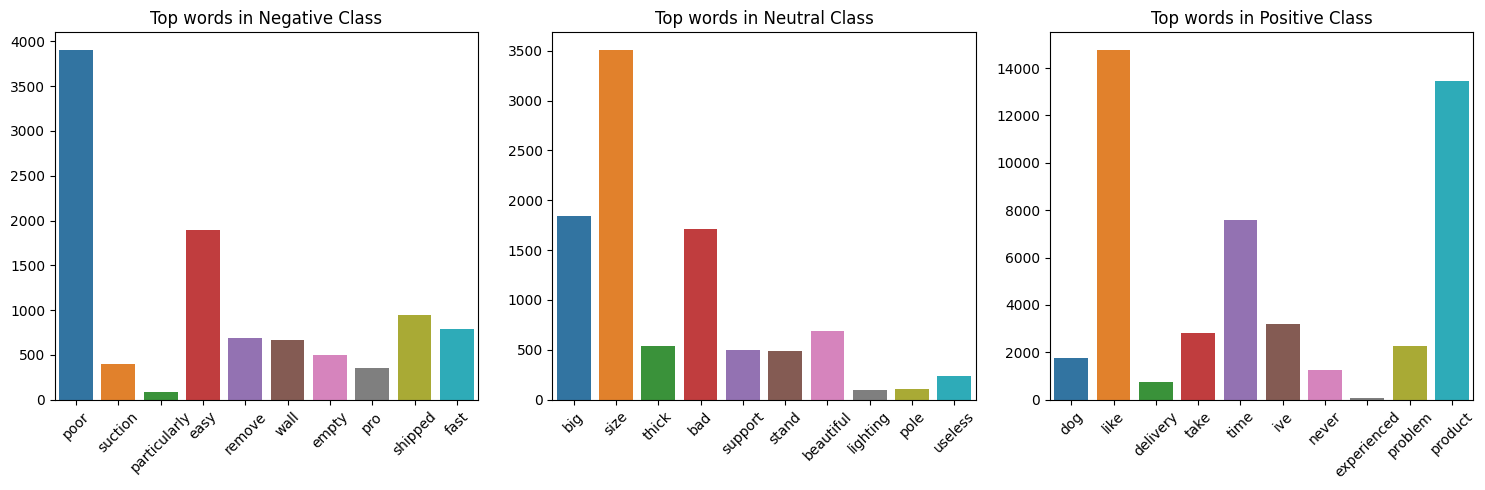

In [ ]:
# Plotting
plt.figure(figsize=(15, 5))
# Negative
plt.subplot(1, 3, 1)
sns.barplot(x=list(freq_negative.keys())[:10], y=list(freq_negative.values())[:10])
plt.title('Top words in Negative Class')
plt.xticks(rotation=45)

# Neutral
plt.subplot(1, 3, 2)
sns.barplot(x=list(freq_neutral.keys())[:10], y=list(freq_neutral.values())[:10])
plt.title('Top words in Neutral Class')
plt.xticks(rotation=45)

# Positive
plt.subplot(1, 3, 3)
sns.barplot(x=list(freq_positive.keys())[:10], y=list(freq_positive.values())[:10])
plt.title('Top words in Positive Class')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 2. Distribution of Sentence Lengths

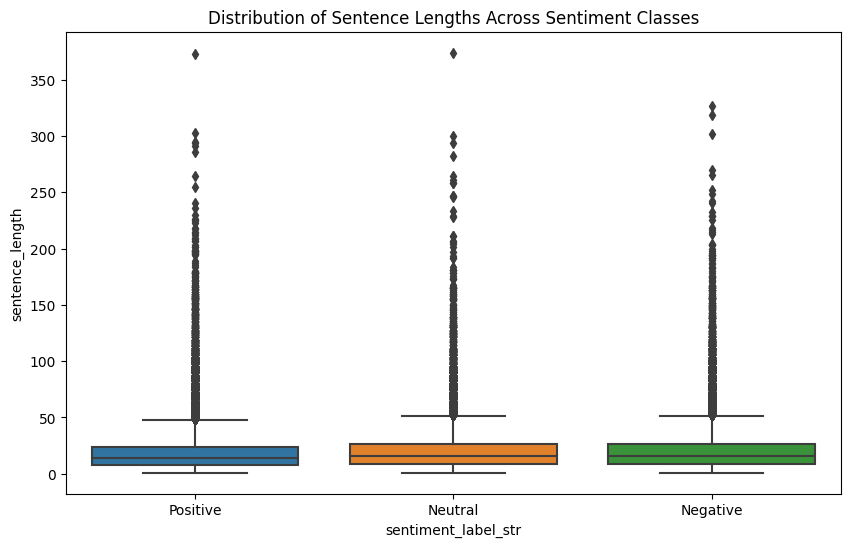

In [ ]:
df['sentence_length'] = df['tokens'].apply(len)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_label_str', y='sentence_length', data=df)
plt.title('Distribution of Sentence Lengths Across Sentiment Classes')
plt.show()

In [ ]:
count_greater_than = (df['sentence_length'] > 100).sum()
print(f"Number of values greater than 59: {count_greater_than}")

Number of values greater than 59: 1114


In [ ]:
df['sentence_length']

0     50
1    120
2     80
3    150
Name: sentence_length, dtype: int64

Word Cloud for Negative Sentiment


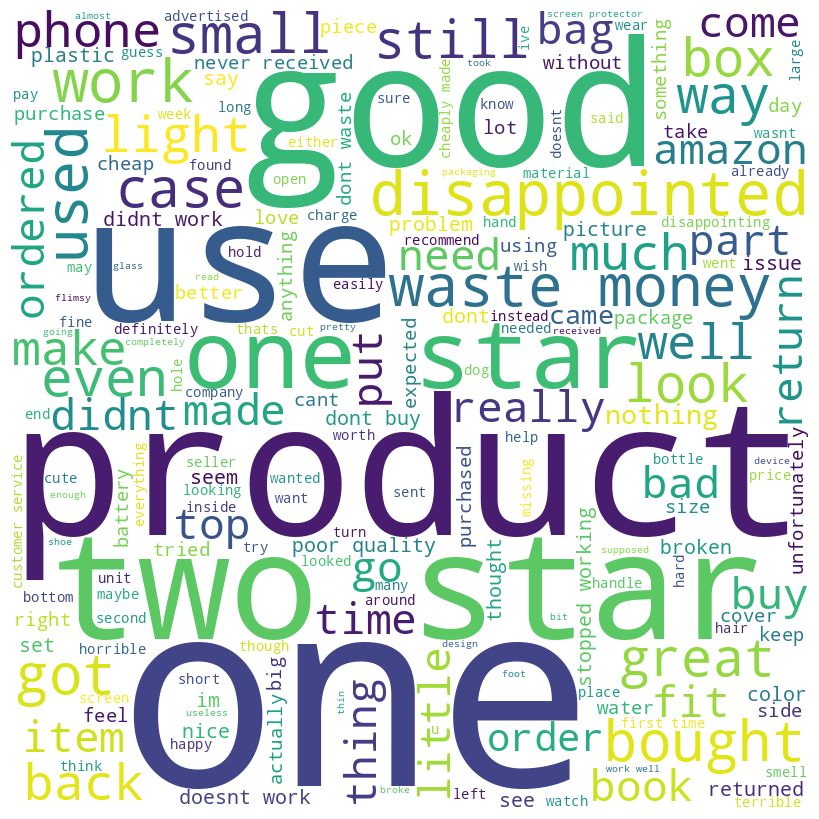

Word Cloud for Neutral Sentiment


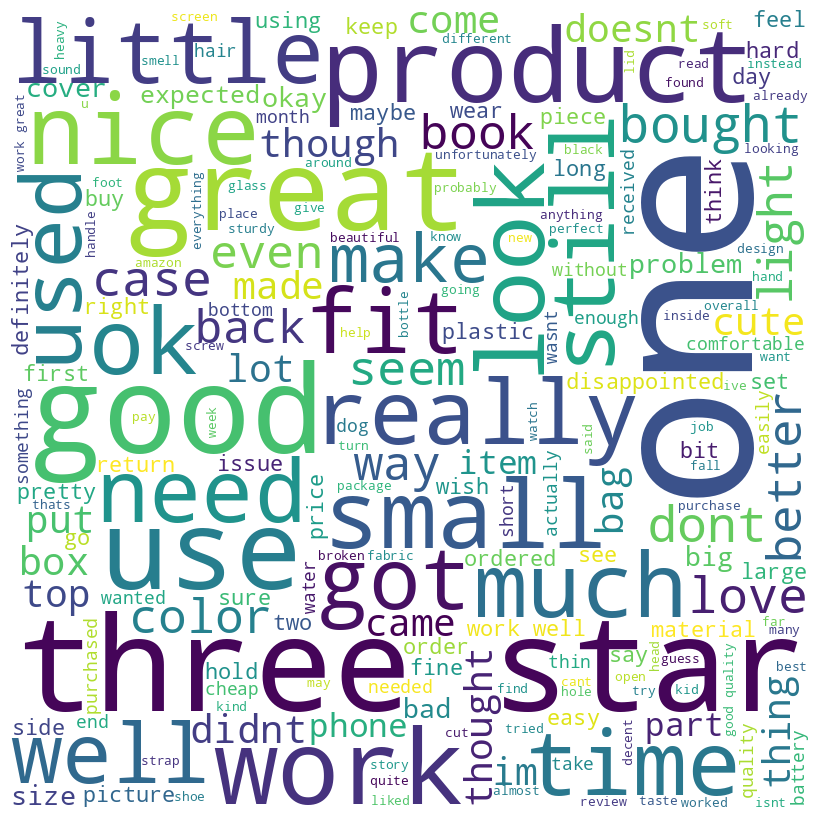

Word Cloud for Positive Sentiment


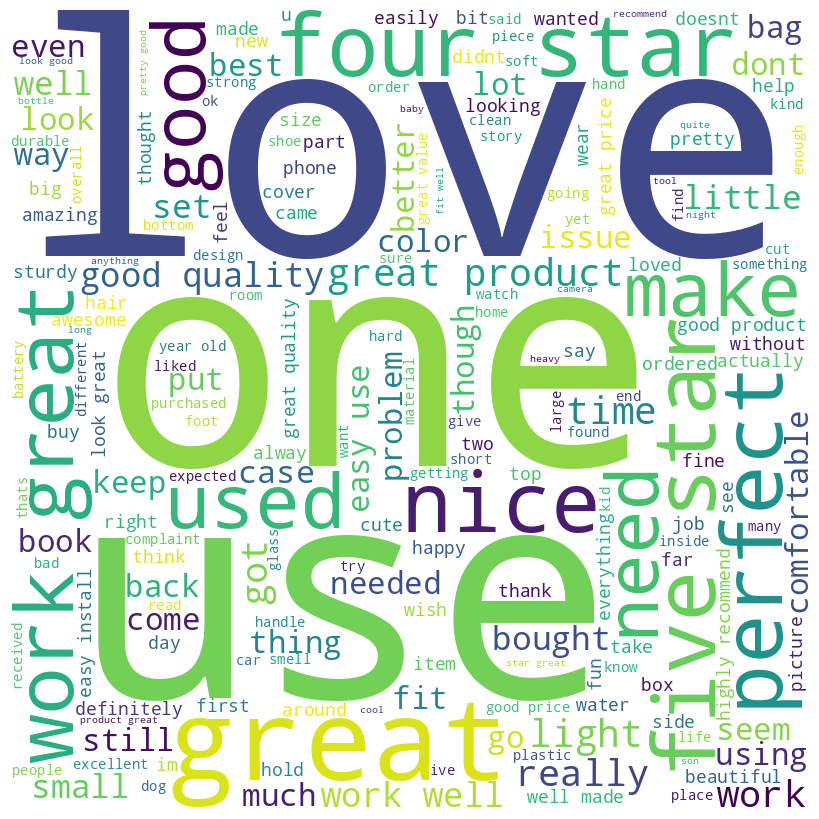

In [ ]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_wordcloud(tokens_list):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10).generate(" ".join(tokens_list))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Generate and display word clouds
print("Word Cloud for Negative Sentiment")
generate_wordcloud(tokens_negative)
print("Word Cloud for Neutral Sentiment")
generate_wordcloud(tokens_neutral)
print("Word Cloud for Positive Sentiment")
generate_wordcloud(tokens_positive)

## Machine Learning

In [ ]:
### Performing

In [ ]:
## Importing Libraries for machine learning:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Extracting Features and Labels
features = df['truncated_tokens'].tolist()
labels = df['sentiment_label'].tolist()

In [ ]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
print(f"Train size: {len(X_train)} test size: {len(X_test)}")

Train size: 159912 test size: 39979


In [ ]:
# Function to Train a Model
def train_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    return model

# Function to Evaluate Performance
def evaluate_performance(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    return accuracy, report

# Function to Compare Models
def compare_models_and_visualize(X, y):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models to compare
    models = {
        "Gaussian Naive Bayes": GaussianNB(),
        "Random Forest": RandomForestClassifier(),
        "Logistic Regression": LogisticRegression()
    }

    # Dictionary to store accuracy of each model
    accuracies = {}

    # Train and evaluate each model
    for name, model in models.items():
        trained_model = train_model(X_train, y_train, model)
        accuracy, report = evaluate_performance(trained_model, X_test, y_test)
        accuracies[name] = accuracy
        print(f"Model: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{report}\n")

    # Visualization
    plt.bar(range(len(accuracies)), list(accuracies.values()), align='center')
    plt.xticks(range(len(accuracies)), list(accuracies.keys()))
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.show()


### Training Naive Bayes Model

In [ ]:
gnb = GaussianNB()
gnb = train_model(X_train, y_train, gnb)

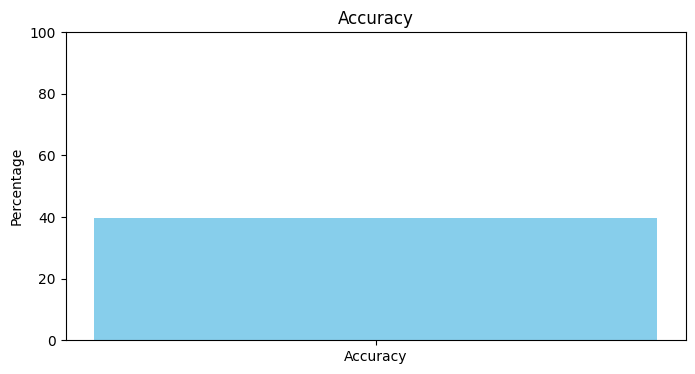

In [ ]:
accuracy, report = evaluate_performance(gnb, X_test, y_test)

# Plot the accuracy as a percentage
plt.figure(figsize=(8, 4))
plt.bar(['Accuracy'], [accuracy * 100], color='skyblue')
plt.ylabel('Percentage')
plt.title('Accuracy')
plt.ylim(0, 100)
plt.show()


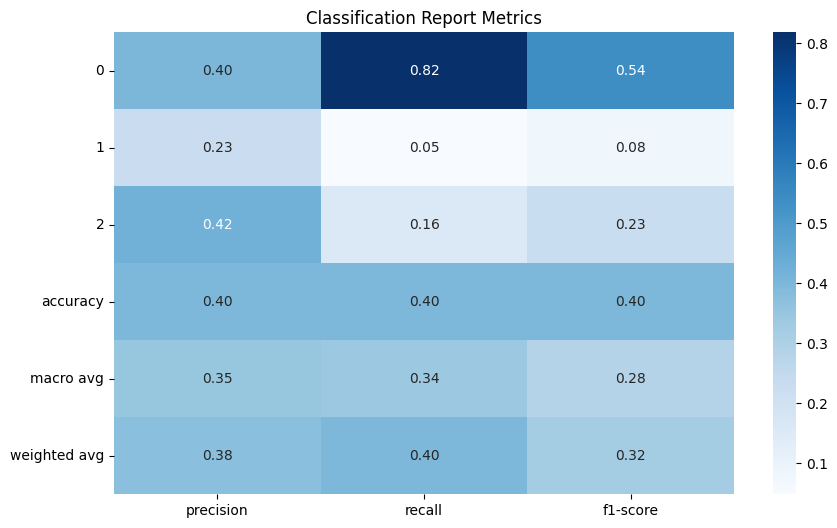

In [ ]:
report_df = pd.DataFrame(report).transpose().drop('support', axis=1)

# Plot a heatmap for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Metrics')
plt.show()

### Train with random forest

In [ ]:
rf = RandomForestClassifier()
rf = train_model(X_train, y_train, rf)

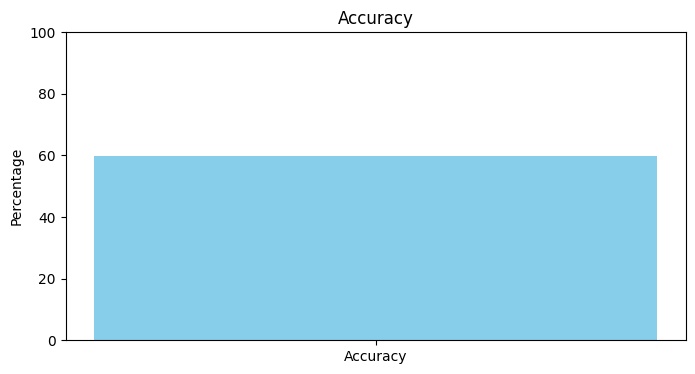

In [ ]:
accuracy, report = evaluate_performance(rf, X_test, y_test)

# Plot the accuracy as a percentage
plt.figure(figsize=(8, 4))
plt.bar(['Accuracy'], [accuracy * 100], color='skyblue')
plt.ylabel('Percentage')
plt.title('Accuracy')
plt.ylim(0, 100)
plt.show()


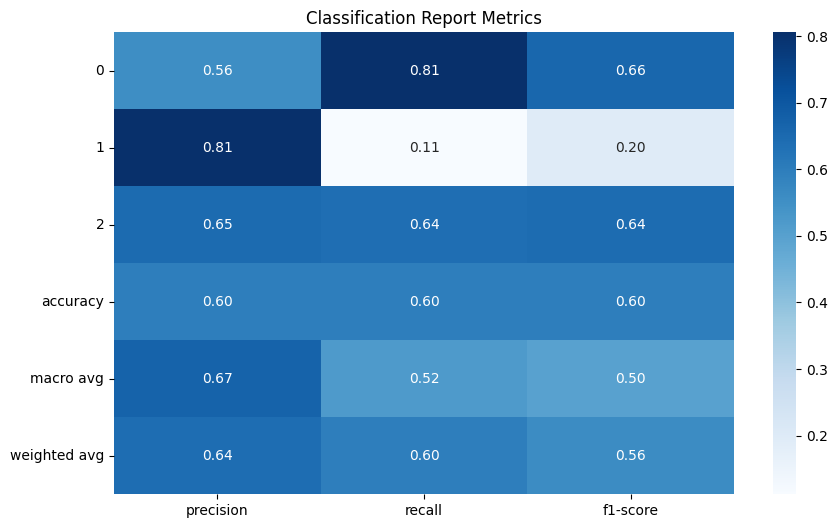

In [ ]:
report_df = pd.DataFrame(report).transpose().drop('support', axis=1)

# Plot a heatmap for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Metrics')
plt.show()

In [ ]:
def preprocess_text(text, tokenizer, max_length=30):
    # Clean text
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Encode tokens using the provided tokenizer
    encoded_tokens = tokenizer.texts_to_sequences([tokens])

    # Pad and/or truncate sequences
    padded_tokens = pad_sequences(encoded_tokens, maxlen=max_length, padding='post', truncating='post')

    return padded_tokens

def decode_sentiment(prediction):
    sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return sentiment_labels[prediction[0]]

def predict_sentiment(review, model, tokenizer, max_length=30):
    preprocessed_review = preprocess_text(review, tokenizer, max_length)
    prediction = model.predict(preprocessed_review)
    return decode_sentiment(prediction)



In [ ]:
review_text = "I really enjoyed this product, it works great!"

array([[ 17, 576,   6,   5,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]], dtype=int32)

In [ ]:
# Example usage
sentiment = predict_sentiment(review_text, rf, tokenizer)
print(f"Sentiment: {sentiment}")

Sentiment: Positive


In [ ]:
df.columns

Index(['prompt', 'completion', 'tokens', 'encoded_tokens', 'truncated_tokens',
       'sentiment_label'],
      dtype='object')

## Checking result by comparing with Bert based pretrained model

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

In [ ]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
r_tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

In [ ]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = "Covid cases are increasing fast!"
text = preprocess(text)
encoded_input = r_tokenizer(text, return_tensors='pt')

In [ ]:
encoded_input

{'input_ids': tensor([[   0,  347, 1417,  808, 1200,   32, 2284, 1769,  328,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
# # TF

# Print labels and scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1) negative 0.7236
2) neutral 0.2287
3) positive 0.0477


In [ ]:
scores

array([0.7235764 , 0.22867921, 0.0477444 ], dtype=float32)

In [ ]:
decode_sentiment([scores.argmax()])

'Negative'

### Testing the bert model

In [ ]:
decoded_text = r_tokenizer.decode(encoded_input, skip_special_tokens=True)
decoded_text

'my dog likes these\n\ndelivery takes some time but ive never experienced any problems with the product my dog loves these one stick seems to last her about 1 week\n\n\n\n'

In [ ]:
df.loc[0]['prompt']

'my dog likes these\n\ndelivery takes some time but ive never experienced any problems with the product my dog loves these one stick seems to last her about 1 week\n\n\n\n'

In [ ]:
df.loc[0]['truncated_tokens']

[169,
 4,
 415,
 106,
 12,
 76,
 68,
 2129,
 126,
 6,
 169,
 14,
 3,
 229,
 136,
 80,
 178,
 75,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

### Points to note:
Here we can see the tokenizer used by the bert model is very perfect where as in our manual data processing we did extensive preprocessing to remove stop words and other details so it has better context.

In [ ]:
features = df['prompt'].tolist()
labels = df['sentiment_label'].tolist()
R_train, R_test, Ry_train, RY_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
R_test[0]

'three stars\n\na little flimsy and top easy would have been better if more firm plastic especially on bottom\n\n\n\n'

In [ ]:
r_encoded_texts = [r_tokenizer.encode_plus(
    preprocess(text),
    # add_special_tokens=True,
    max_length=100
    return_tensors='pt'
) for text in R_test]

In [ ]:
len(r_encoded_texts)

39979

In [ ]:
r_encoded_texts[0]

{'input_ids': [0, 9983, 2690, 50118, 50118, 102, 410, 2342, 38755, 8, 299, 1365, 74, 33, 57, 357, 114, 55, 933, 4136, 941, 15, 2576, 50140, 50140, 2, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]}

In [ ]:
r_pred = []
for x in r_encoded_texts:
  oput = model(**x)
  scores = oput[0][0].detach().numpy()
  scores = softmax(scores)
  r_pred.append(scores.argmax())

In [ ]:
len(r_pred)

7802

In [ ]:
r_acc = accuracy_score(RY_test[:7802], r_pred)

In [ ]:
r_acc

0.7093053063317099

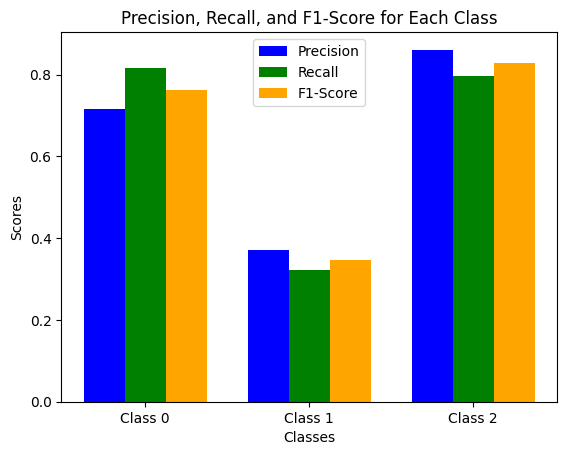

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
y_pred_sample = r_pred  # Replace with your predictions
y_test_sample = RY_test[:7802]  # Replace with your ground truth labels

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_sample, y_pred_sample, average=None)

# Create a bar chart to visualize the results for each class
classes = ['Class 0', 'Class 1', 'Class 2']  # Replace with your class labels
bar_width = 0.25
index = np.arange(len(classes))

plt.bar(index, precision, bar_width, label='Precision', color='blue')
plt.bar(index + bar_width, recall, bar_width, label='Recall', color='green')
plt.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='orange')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xticks(index + bar_width, classes)
plt.legend()
plt.show()


In [ ]:
print(precision, recall, f1_score)

[0.71618187 0.37088515 0.86074637] [0.81569637 0.32313576 0.79737516] [0.76270677 0.34536785 0.82784978]


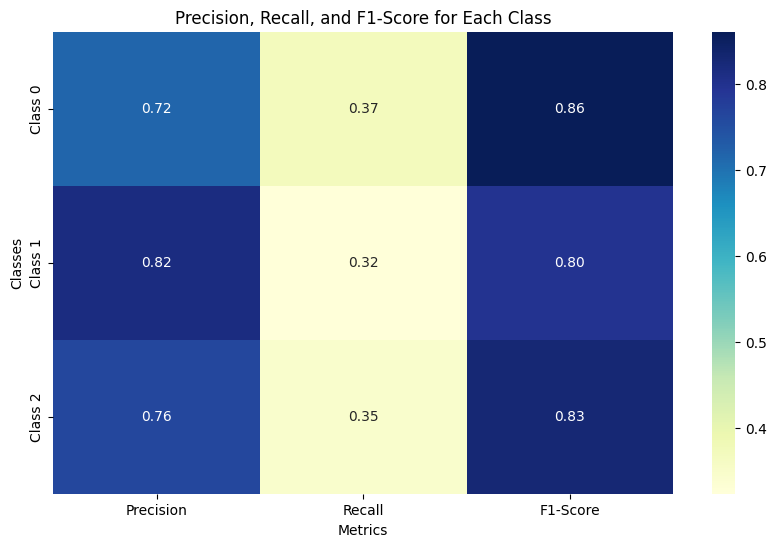

In [ ]:
# Create a matrix of precision, recall, and F1-score
scores_matrix = np.array([precision, recall, f1_score])

# Define class labels (replace with your class labels)
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_labels)
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()